### Model Notebook

#### This is the notebook for model in age gender detector. Here we will extract the data, train it, fit it into our model, and will evaluate our results to optimize the model for better results.

#### Import the Necessary libraries 

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad, Adadelta,Adamax,RMSprop

#### Extract Data from the Dataset

In [ ]:
fldr = "./dataset/UTKFace"

In [ ]:
import os
files = os.listdir(fldr)

#### Create list of Images from the Dataset

In [ ]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

In [ ]:
# for fle in files:
#     age = int(fle.split('_')[0])
#     gender = int(fle.split('_')[1])
#     ages.append(age)
#     gender.append(gender)

#### Create List of Age and Gender from the Dataset

In [ ]:
ages = []
genders = []

for fle in files:
    age = int(fle.split('_')[0])
    gender_value = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender_value)

####  Viewing a Sample

In [ ]:
plt.imshow(images[45])
print(ages[45])
print(genders[45])

#### Saving Images array, ages array, and genders array in the system

In [ ]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

#### Finding the number of Male and Female samples respectively in the Dataset

In [ ]:
values,counts = np.unique(genders_f, return_counts = True)
print(counts)

#### Plotting the number of Male and Female Samples

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values =  [12391, 11317]
ax.bar(gender,values)
plt.show()

#### Finding the number of samples in each age

In [ ]:
values,counts = np.unique(ages_f,return_counts = True)
print(counts)

#### Converting Age counts to lists

In [ ]:
val = values.tolist()
cnt = counts.tolist()

#### Plotting the Samples Agewise

In [ ]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

#### Defining Labels for Output

In [ ]:
labels = []
i = 0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i+=1

#### Creating another list of images from existing one for better learning

In [ ]:
images_f_2 = images_f/255

In [ ]:
images_f_2.shape

In [ ]:
labels_f = np.array(labels)

#### Splitting the Dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2, labels_f, test_size = 0.25)

In [ ]:
Y_train[0:5]

#### Splitting 'Y_test and Y_train' furthur for better understanding

In [ ]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

In [ ]:
Y_train_2[1][0:5]

### Defining The Model

In [ ]:
# def Convolution(input_tensor, filters):
#     x = Conv2D(filters=filters, kernel_size = (3,3), padding="same", strides=(1,1),kernel_regularizer=12(0.001))(input_tensor)
#     x = Dropout(0.1)(x)
#     x = Activation('relu')(x)
#     return x

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [ ]:
# def model(input_shape):
#     inputs = Input((input_shape))
#     conv_1 = Convolution(inputs,32)
#     max_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
#     conv_2 = Convolution(max_1,64)
#     max_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
#     conv_3 = Convolution(maxp_2,128)
#     maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
#     conv_4 = Convolution(maxp_3, 256)
#     maxp_4 = MaxPooling2D(pool_size = (2,2))(conv_4)
#     flatten = Flatten()(maxp_4)
#     dense_1 = Dense(64,activation='relu')(flatten)
#     dense_2 = Dense(64,activation='relu')(flatten)
#     drop_1 = Dropout(0.2)(dense_1)
#     drop_2 = Dropout(0.2)(dense_2)
#     output_1 = Dense(1,activation='sigmoid',name='sex_output')(drop_1)
#     output_2 = Dense(1,activation='relu',name='age_output')(drop_2)
#     model = Model(inputs = [inputs],outputs=[output_1,output_2])
#     model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",matrics=["accuracy"])
#     return model

def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(max_1, 64)
    max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(max_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    conv_5 = Convolution(maxp_4, 512)
    maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='swish')(flatten)
    dense_2 = Dense(64, activation='swish')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_output')(drop_1)
    output_2 = Dense(1, activation='swish', name='age_output')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [ ]:
Model = model((48, 48, 3))

In [ ]:
Model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

#### Initializing the Model

In [ ]:
fle_s = 'Age_Gender_Detection.h5'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,model='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights=True)
callback_list = [checkpoint,Early_stop]

#### Runnning the Model
##### It will take a lot of Time

In [ ]:
History = Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

#### Model Evaluation

In [ ]:
 Model.evaluate(X_test, Y_test_2)

In [ ]:
pred = Model.predict(X_test)

In [ ]:
pred[1]

#### Plotting the Loss

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

#### Plotting Gender Accuracy

In [ ]:
plt.plot(History.history['sex_output_accuracy'])
plt.plot(History.history['val_sex_output_accuracy'])
plt.title('Model Accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

#### Plotting Age Accuracy

In [ ]:
fig,ax = plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### Making Report of the Model(Gender Only)

In [ ]:
i = 0
pred_1 = []
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i+=1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(Y_test_2[0],pred_1)

In [ ]:
print(report)

#### Making heat map of the Model(Gender Only)

In [ ]:
results = confusion_matrix(Y_test_2[0],pred_1)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(results,annot=True)

#### Testing the Images Ourself

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_1 = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    print("Predicted Age is: "+ str(age))
    print("Predicted Gender is: "+ sex_f[sex])

##### Tests

1/1 [==============================] - 0s 45ms/step
Predicted Age is: 34
Predicted Gender is: Male


/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


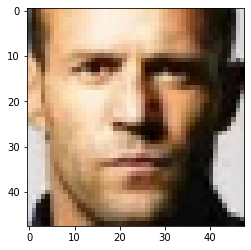

In [91]:
test_image(95,images_f,images_f_2,Model)

1/1 [==============================] - 0s 93ms/step
Predicted Age is: 21
Predicted Gender is: Male


/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


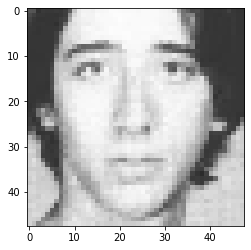

In [70]:
test_image(33,images_f,images_f_2,Model)

1/1 [==============================] - 0s 102ms/step
Predicted Age is: 29
Predicted Gender is: Male


/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


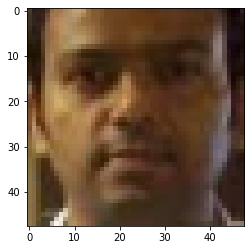

In [71]:
test_image(17,images_f,images_f_2,Model)

1/1 [==============================] - 0s 257ms/step
Predicted Age is: 2
Predicted Gender is: Male


/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
/var/folders/gw/sv3bgzmn6lj9r1p2qtlyjx040000gn/T/ipykernel_43599/2270774410.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


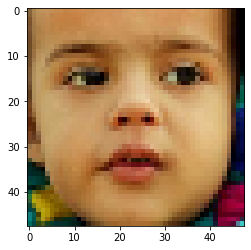

In [108]:
test_image(919,images_f,images_f_2,Model)